In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023.xlsx"
veri = pd.read_excel(excel_yolu, sheet_name='neat_result')

# Histogramlar için klasör oluştur
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/histogramlar/"
import os
if not os.path.exists(klasor_yolu):
    os.makedirs(klasor_yolu)

# Sütun başlıkları
sutun_basliklari = ['c(Hb) (Ha/Hb)', '[OII] density', '[SII] Density', ' [ArIV] density', 
                    ' [OII] temperature', ' [SII] temperature', ' [NII] temperature', 
                    ' [OI] temperature', '[OIII] Temperature', ' [NeIII] temperature', 
                    ' [ArIII] temperature', ' [ArV] temperature', ' He I temperature (7281/6678)', 
                    'C/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H', 'He/H']

# Her sütun için histogram oluştur
for baslik in sutun_basliklari:
    # 0 olmayan değerleri filtrele
    filtreli_veri = veri[(veri[baslik] != 0) & (veri[baslik] != 35000)][baslik]
    
    # Histogram oluştur
    plt.hist(filtreli_veri, bins=50, edgecolor='black')
    
    # Plot ayarları
    plt.title(baslik)
    plt.xlabel("Değer")
    plt.ylabel("Frekans")
    
    # Histogramı kaydet
    kaydet_yolu = os.path.join(klasor_yolu, f"{baslik.replace('/', '_')}.png")
    plt.savefig(kaydet_yolu, dpi=300)
    
    # Plot'u temizle
    plt.clf()

print("Histogramlar başarıyla oluşturuldu ve kaydedildi.")

Histogramlar başarıyla oluşturuldu ve kaydedildi.


<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import os

# Excel dosyasını yükle
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx'
sheet_name = 'neat_result'

# GDPN klasör yolunu belirtin
gdpn_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE'

# Excel dosyasını oku
df = pd.read_excel(file_path, sheet_name=sheet_name)

# idPNMain sütununu oluştur
df['idPNMain'] = ''

# fits_name sütunundaki her bir dosya ismi için ilgili klasör adını bul
for index, row in df.iterrows():
    fits_name = row['fits_name']
    found = False
    for root, dirs, files in os.walk(gdpn_path):
        for file in files:
            if file.startswith(fits_name):
                # İlgili klasör adını idPNMain sütununa yaz
                df.at[index, 'idPNMain'] = os.path.basename(root)
                found = True
                break
        if found:
            break

# Değişiklikleri Excel dosyasına kaydet
df.to_excel(file_path, sheet_name=sheet_name, index=False)

print("İşlem tamamlandı.")

İşlem tamamlandı.


In [11]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Excel dosyasının yolunu belirtin
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx'

# Sayfa adlarını belirtin
sheet1_name = 'Sayfa11'
sheet2_name = 'neat_result'

# Excel dosyasını yükle
wb = load_workbook(file_path)
sheet1 = wb[sheet1_name]
sheet2 = wb[sheet2_name]

# DataFrames oluştur
df1 = pd.read_excel(file_path, sheet_name=sheet1_name)
df2 = pd.read_excel(file_path, sheet_name=sheet2_name)

# Sayfa11'deki idPNMain sütunundaki hücre renklerini saklamak için bir sözlük oluştur
color_map = {}
idPNMain_col_idx1 = df1.columns.get_loc('idPNMain') + 1

for row in sheet1.iter_rows(min_row=2):
    cell = row[idPNMain_col_idx1 - 1]
    if cell.value:
        color_map[cell.value] = cell.fill

# neat_result sayfasındaki idPN sütunundaki hücreleri renklendir
idPN_col_idx2 = df2.columns.get_loc('idPN') + 1

for row in sheet2.iter_rows(min_row=2):
    cell = row[idPN_col_idx2 - 1]
    if cell.value in color_map:
        fill = color_map[cell.value]
        for c in row:
            c.fill = fill

# Değişiklikleri kaydet
wb.save(file_path)

print("Hücre renkleri başarıyla eşleştirildi.")


Hücre renkleri başarıyla eşleştirildi.


In [24]:
############# ÖNCEKİ

import pandas as pd
import matplotlib.pyplot as plt
import os

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx"
neat_result_df = pd.read_excel(excel_yolu, sheet_name='neat_result')
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa2')

# Renklendirme bilgilerini al
idPNMain_col = 'idPNMain'
Gdist_col = 'Gdist'

# Histogramlar için klasör oluştur
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/histogramlar/deneme"
if not os.path.exists(klasor_yolu):
    os.makedirs(klasor_yolu)

# Renklendirme kriterleri
z_ince_disk_max = 400  # parsek
z_kalin_disk_max = 1000  # parsek
galactic_center_radius = 14.32  # Galaktik merkezin şişkin bölgesinin yarıçapı (15 derece)

# Renklendirme fonksiyonu
def get_color(row):
    dist = row[Gdist_col]
    if pd.isna(dist) or dist == 0:
        return 'gray'
    elif abs(dist) <= z_ince_disk_max:
        return 'red'
    elif abs(dist) <= z_kalin_disk_max:
        return 'green'
    elif abs(dist) <= galactic_center_radius:
        return 'blue'
    else:
        return 'orange'

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df.apply(get_color, axis=1)
renk_dict = renklendirilmis_df.set_index(idPNMain_col)['color'].to_dict()

# Sütun başlıkları
sutun_basliklari = ['c(Hb) (Ha/Hb)', '[OII] density', '[SII] Density', ' [ArIV] density', 
                    ' [OII] temperature', ' [SII] temperature', ' [NII] temperature', 
                    ' [OI] temperature', '[OIII] Temperature', ' [NeIII] temperature', 
                    ' [ArIII] temperature', ' [ArV] temperature', ' He I temperature (7281/6678)', 
                    'C/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H', 'He/H']

# Renklere karşılık gelen etiketler
renk_etiketleri = {
    'red': 'Thin Disc',
    'green': 'Thick Disc',
    'blue': 'Bulge',
    'orange': 'Halo',
    'gray': 'No Distance'
}

# Her sütun için histogram oluştur
for baslik in sutun_basliklari:
    plt.figure()
    for color, etiket in renk_etiketleri.items():
        filtreli_veri = neat_result_df[neat_result_df[idPNMain_col].map(renk_dict) == color][baslik]
        filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
        
        if not filtreli_veri.empty:
            plt.hist(filtreli_veri, bins=50, edgecolor='black', alpha=0.5, color=color, label=etiket)
    
    # Plot ayarları
    plt.title(baslik)
    plt.xlabel("Değer")
    plt.ylabel("Frekans")
    plt.legend()
    
    # Histogramı kaydet
    kaydet_yolu = os.path.join(klasor_yolu, f"{baslik.replace('/', '_')}.png")
    plt.savefig(kaydet_yolu, dpi=300)
    
    # Plot'u temizle
    plt.clf()

print("Histogramlar başarıyla oluşturuldu ve renklendirildi.")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_60866/501038536.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are 

Histogramlar başarıyla oluşturuldu ve renklendirildi.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx"
neat_result_df = pd.read_excel(excel_yolu, sheet_name='neat_result')
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa2')

# Histogramlar için klasör oluştur
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/histogramlar/sondeneme"
if not os.path.exists(klasor_yolu):
    os.makedirs(klasor_yolu)

# Renklendirme fonksiyonu
def get_color(component):
    if component == 'Bulge':
        return 'blue'
    elif component == 'Thin Disc':
        return 'red'
    elif component == 'Thick Disk':
        return 'green'
    elif component == 'Halo':
        return 'orange'
    elif component == 'no distance':
        return 'gray'
    else:
        return None

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df['Gbileşen'].apply(get_color)
renk_dict = renklendirilmis_df.set_index('idPNMain')['color'].to_dict()

# Sütun başlıkları
sutun_basliklari = ['c(Hb) (Ha/Hb)', '[OII] density', '[SII] Density', ' [ArIV] density', 
                    ' [OII] temperature', ' [SII] temperature', ' [NII] temperature', 
                    ' [OI] temperature', '[OIII] Temperature', ' [NeIII] temperature', 
                    ' [ArIII] temperature', ' [ArV] temperature', ' He I temperature (7281/6678)', 
                    'C/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H', 'He/H']

# Renklere karşılık gelen etiketler
renk_etiketleri = {
    'red': 'Thin Disc',
    'green': 'Thick Disc',
    'blue': 'Bulge',
    'orange': 'Halo',
    'gray': 'No Distance'
}

# Her sütun için histogram oluştur
for baslik in sutun_basliklari:
    plt.figure()
    for color, etiket in renk_etiketleri.items():
        filtreli_veri = neat_result_df[neat_result_df[idPNMain_col].map(renk_dict) == color][baslik]
        filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
        
        if not filtreli_veri.empty:
            plt.hist(filtreli_veri, bins=50, edgecolor='black', alpha=0.5, color=color, label=etiket)
    
    # Plot ayarları
    plt.title(baslik)
    plt.xlabel("Değer")
    plt.ylabel("Frekans")
    plt.legend()
    
    # Histogramı kaydet
    kaydet_yolu = os.path.join(klasor_yolu, f"{baslik.replace('/', '_')}.png")
    plt.savefig(kaydet_yolu, dpi=300)
    
    # Plot'u temizle
    plt.clf()

print("Histogramlar başarıyla oluşturuldu ve renklendirildi.")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Histogramlar başarıyla oluşturuldu ve renklendirildi.


/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_60866/4040510586.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx"
neat_result_df = pd.read_excel(excel_yolu, sheet_name='neat_result')
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa3')

# Histogramlar için klasör oluştur
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/histogramlar/binleme/"
if not os.path.exists(klasor_yolu):
    os.makedirs(klasor_yolu)

# Renklendirme fonksiyonu
def get_color(component):
    if component == 'Bulge':
        return 'blue'
    elif component == 'Thin Disc':
        return 'red'
    elif component == 'Thick Disk':
        return 'green'
    elif component == 'Halo':
        return 'orange'
    elif component == 'no distance':
        return 'gray'
    else:
        return None

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df['Gbileşen'].apply(get_color)
renk_dict = renklendirilmis_df.set_index('idPNMain')['color'].to_dict()

# Sütun başlıkları
sutun_basliklari = ['c(Hb) (Ha/Hb)', '[OII] density', '[SII] Density', ' [ArIV] density', 
                    ' [OII] temperature', ' [SII] temperature', ' [NII] temperature', 
                    ' [OI] temperature', '[OIII] Temperature', ' [NeIII] temperature', 
                    ' [ArIII] temperature', ' [ArV] temperature', ' He I temperature (7281/6678)', 
                    'C/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H', 'He/H']

# Histogram parametreleri
histogram_parametreleri = {
    'c(Hb) (Ha/Hb)': {'bins': 100, 'range': (0, 3)},
    '[OII] density': {'bins': 50, 'range': (0, 1000)},
    '[SII] Density': {'bins': 50, 'range': (0, 1000)},
    ' [ArIV] density': {'bins': 50, 'range': (0, 1000)},
    ' [OII] temperature': {'bins': 50, 'range': (0, 20000)},
    ' [SII] temperature': {'bins': 50, 'range': (0, 20000)},
    ' [NII] temperature': {'bins': 50, 'range': (0, 20000)},
    ' [OI] temperature': {'bins': 50, 'range': (0, 20000)},
    '[OIII] Temperature': {'bins': 50, 'range': (0, 20000)},
    ' [NeIII] temperature': {'bins': 50, 'range': (0, 20000)},
    ' [ArIII] temperature': {'bins': 50, 'range': (0, 20000)},
    ' [ArV] temperature': {'bins': 50, 'range': (0, 20000)},
    ' He I temperature (7281/6678)': {'bins': 50, 'range': (0, 20000)},
    'C/H': {'bins': 50, 'range': (0, 1e-4)},
    'N/H': {'bins': 50, 'range': (0, 1e-4)},
    'O/H': {'bins': 50, 'range': (0, 1e-4)},
    'Ne/H': {'bins': 50, 'range': (0, 1e-4)},
    'Ar/H': {'bins': 50, 'range': (0, 1e-4)},
    'S/H': {'bins': 50, 'range': (0, 1e-4)},
    'Cl/H': {'bins': 50, 'range': (0, 1e-4)},
    'He/H': {'bins': 50, 'range': (0, 0.2)}
}

# Renklere karşılık gelen etiketler
renk_etiketleri = {
    'red': 'Thin Disc',
    'green': 'Thick Disc',
    'blue': 'Bulge',
    'orange': 'Halo',
    'gray': 'No Distance'
}

# Her sütun için histogram oluştur
for baslik in sutun_basliklari:
    plt.figure()
    bins = histogram_parametreleri[baslik]['bins']
    range_ = histogram_parametreleri[baslik]['range']
    
    for color, etiket in renk_etiketleri.items():
        filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][baslik]
        filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
        
        if not filtreli_veri.empty:
            plt.hist(filtreli_veri, bins=bins, range=range_, edgecolor='black', alpha=0.5, color=color, label=etiket)
    
    # Plot ayarları
    plt.title(baslik)
    plt.xlabel("Değer")
    plt.ylabel("Frekans")
    plt.legend()
    
    # Histogramı kaydet
    kaydet_yolu = os.path.join(klasor_yolu, f"{baslik.replace('/', '_')}.png")
    plt.savefig(kaydet_yolu, dpi=300)
    
    # Plot'u temizle
    plt.clf()

print("Histogramlar başarıyla oluşturuldu ve renklendirildi.")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_60866/451107737.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are 

Histogramlar başarıyla oluşturuldu ve renklendirildi.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx"
neat_result_df = pd.read_excel(excel_yolu, sheet_name='neat_result')
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa11')

# Histogramlar için klasör oluştur
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/histogramlar/binleme/son/"
if not os.path.exists(klasor_yolu):
    os.makedirs(klasor_yolu)

# Ortalamalar için dosya oluştur
ortalama_dosyasi_yolu = os.path.join(klasor_yolu, "ortalama_degerler.txt")

# Renklendirme fonksiyonu
def get_color(component):
    if component == 'Bulge':
        return 'blue'
    elif component == 'Thin Disc':
        return 'red'
    elif component == 'Thick Disk':
        return 'green'
    elif component == 'Halo':
        return 'orange'
    elif component == 'no distance':
        return 'gray'
    else:
        return None

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df['Gbileşen'].apply(get_color)
renk_dict = renklendirilmis_df.set_index('idPNMain')['color'].to_dict()

# Sütun başlıkları
sutun_basliklari = ['c(Hb) (Ha/Hb)', 'c(Hb) (Hg/Hb)', 'c(Hb) (Hd/Hb)', '[OII] density', '[SII] Density', ' [ArIV] density', 
                    ' [OII] temperature', ' [SII] temperature', ' [NII] temperature', 
                    ' [OI] temperature', '[OIII] Temperature', ' [NeIII] temperature', 
                    ' [ArIII] temperature', ' [ArV] temperature', ' He I temperature (7281/6678)', 
                    'C/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H', 'He/H']

# Histogram parametreleri
histogram_parametreleri = {
    'c(Hb) (Ha/Hb)': {'bins': 50, 'range': (0, 6)},
    'c(Hb) (Hg/Hb)': {'bins': 50, 'range': (0, 6)},
    'c(Hb) (Hd/Hb)': {'bins': 50, 'range': (0, 6)},
    '[OII] density': {'bins': 50, 'range': (0, 20000)},
    '[SII] Density': {'bins': 50, 'range': (0, 15000)},
    ' [ArIV] density': {'bins': 50, 'range': (0, 70000)},
    ' [OII] temperature': {'bins': 50, 'range': (5000, 35000)},
    ' [SII] temperature': {'bins': 50, 'range': (0, 35000)},
    ' [NII] temperature': {'bins': 100, 'range': (5000, 35000)},
    ' [OI] temperature': {'bins': 50, 'range': (0, 35000)},
    '[OIII] Temperature': {'bins': 50, 'range': (5000, 35000)},
    ' [NeIII] temperature': {'bins': 50, 'range': (0, 35000)},
    ' [ArIII] temperature': {'bins': 50, 'range': (5000, 35000)},
    ' [ArV] temperature': {'bins': 50, 'range': (0, 35000)},
    ' He I temperature (7281/6678)': {'bins': 50, 'range': (0, 4e5)},
    'C/H': {'bins': 50, 'range': (0, 1e-3)},
    'N/H': {'bins': 50, 'range': (0, 1e-3)},
    'O/H': {'bins': 50, 'range': (0, 3e-3)},
    'Ne/H': {'bins': 50, 'range': (0, 3e-3)},
    'Ar/H': {'bins': 50, 'range': (0, 175e-7)},
    'S/H': {'bins': 50, 'range': (0, 3e-5)},
    'Cl/H': {'bins': 50, 'range': (0, 0.6e-5)},
    'He/H': {'bins': 50, 'range': (0, 0.5)}
}

# Renklere karşılık gelen etiketler
renk_etiketleri = {
    'red': 'Thin Disc',
    'green': 'Thick Disc',
    'blue': 'Bulge',
    'orange': 'Halo',
    'gray': 'No Distance'
}

# Ortalamaları yazmak için dosyayı aç
with open(ortalama_dosyasi_yolu, 'w') as f:
    # Her sütun için histogram oluştur
    for baslik in sutun_basliklari:
        plt.figure()
        bins = histogram_parametreleri[baslik]['bins']
        range_ = histogram_parametreleri[baslik]['range']
        ortalamalar = {}
        
        for color, etiket in renk_etiketleri.items():
            filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][baslik]
            filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
            
            if not filtreli_veri.empty:
                plt.hist(filtreli_veri, bins=bins, range=range_, edgecolor='black', color=color, label=etiket)
                ortalamalar[etiket] = filtreli_veri.mean()
        
        # Ortalama değerleri kesikli çizgilerle göster
        for etiket, ortalama in ortalamalar.items():
            color = [k for k, v in renk_etiketleri.items() if v == etiket][0]
            plt.axvline(ortalama, color=color, linestyle='dashed', linewidth=1)
            f.write(f"{baslik} - {etiket} Ortalama: {ortalama:.2f}\n")
        
        # Plot ayarları
        plt.title(baslik)
        plt.xlabel("Değer")
        plt.ylabel("Frekans")
        plt.legend()
        
        # Histogramı kaydet
        kaydet_yolu = os.path.join(klasor_yolu, f"{baslik.replace('/', '_')}.png")
        plt.savefig(kaydet_yolu, dpi=300)
        
        # Plot'u temizle
        plt.clf()

print("Histogramlar başarıyla oluşturuldu ve ortalamalar listeye yazıldı.")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_5422/238974360.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are r

Histogramlar başarıyla oluşturuldu ve ortalamalar listeye yazıldı.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

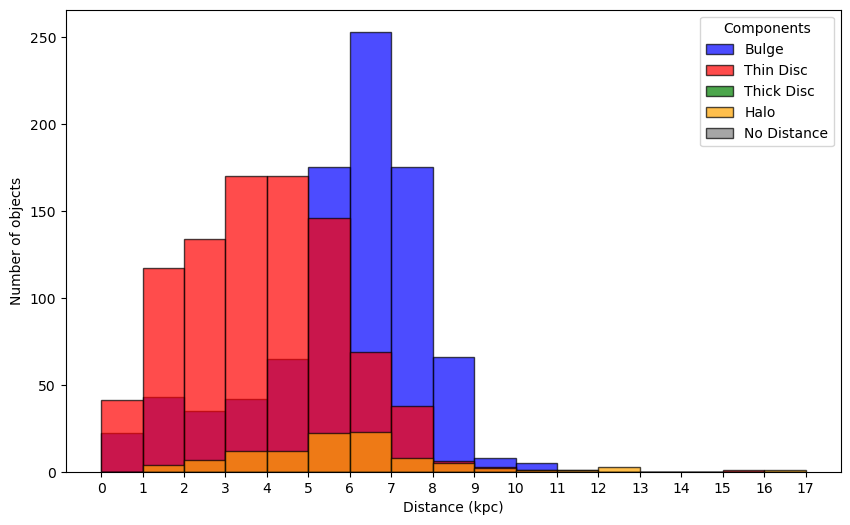

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx"
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa6')

# Kullanılacak sütunları seç
rgeo_sutunu = renklendirilmis_df['rgeo']
gbilesen_sutunu = renklendirilmis_df['Gbileşen']

# Verileri pc biriminden kpc birimine dönüştür
rgeo_sutunu_kpc = rgeo_sutunu / 1000

# Renklerin ve etiketlerin belirlenmesi
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disc': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
    'No Distance': 'gray'     # no distance ise gri
}

plt.figure(figsize=(10, 6))

bins = np.arange(0, 18, 1)

# Her bir bileşen için histogramları çiz
for component, color in renk_etiketleri.items():
    component_values = rgeo_sutunu_kpc[gbilesen_sutunu == component]
    plt.hist(component_values, bins=bins, alpha=0.7, label=component, color=color, edgecolor='black')

plt.xticks(bins)
plt.xlabel('Distance (kpc)')
plt.ylabel('Number of objects')
#plt.title('rgeo Histogram with Colors')
plt.legend(title='Components')
plt.show()

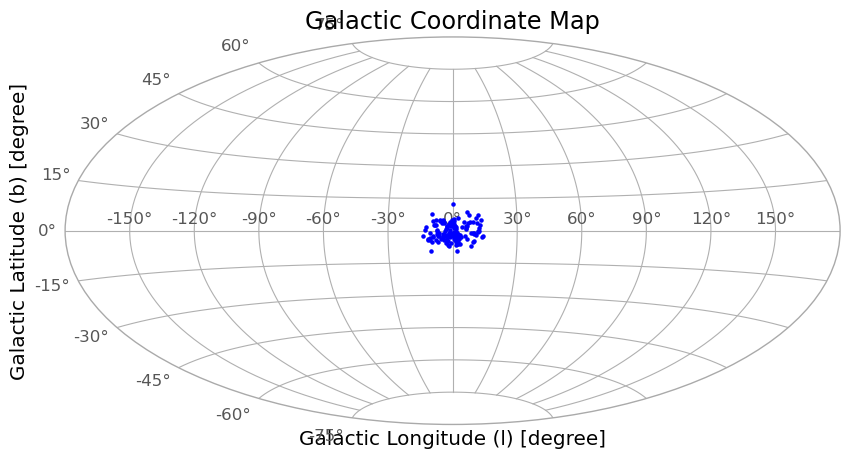

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excel dosyasını yükle
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx'
sheet_name = 'Sayfa6'

# Excel dosyasını oku
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Gbileşen değeri 'Bulge' olan ve rgeo değeri 4 kpc'den küçük olan satırları seç
filtre = (df['Gbileşen'] == 'Bulge') & (df['rgeo'] < 4000)
bulge_4kpc_alti_df = df.loc[filtre]

# Galactic_RA, Galactic_DEC ve Disc_R sütunlarını al
galactic_ra = bulge_4kpc_alti_df['Glon']
galactic_dec = bulge_4kpc_alti_df['Glat']
disc_r = bulge_4kpc_alti_df['Gdist']  # Galaktik merkezden uzaklık sütunu (parsek cinsinden)

# Galaktik koordinatları al
l = galactic_ra
b = galactic_dec

# Galaksi merkezini aitoff projeksiyonu üzerinde 0 dereceye 0 derecede konumlandırmak için
l_centered = (l - 180) % 360 - 180  # -180 ile 180 derece arasında merkezlenmiş boylam

# Harita oluştur
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='aitoff')
ax.grid(True)

# Galaksi yapısını çiz
ax.scatter(np.radians(l_centered), np.radians(b), color='blue', s=5)

# Eksenleri ve başlığı ekle
ax.set_title('Galactic Coordinate Map')
ax.set_xlabel('Galactic Longitude (l) [degree]')
ax.set_ylabel('Galactic Latitude (b) [degree]')

# Göster
plt.show()

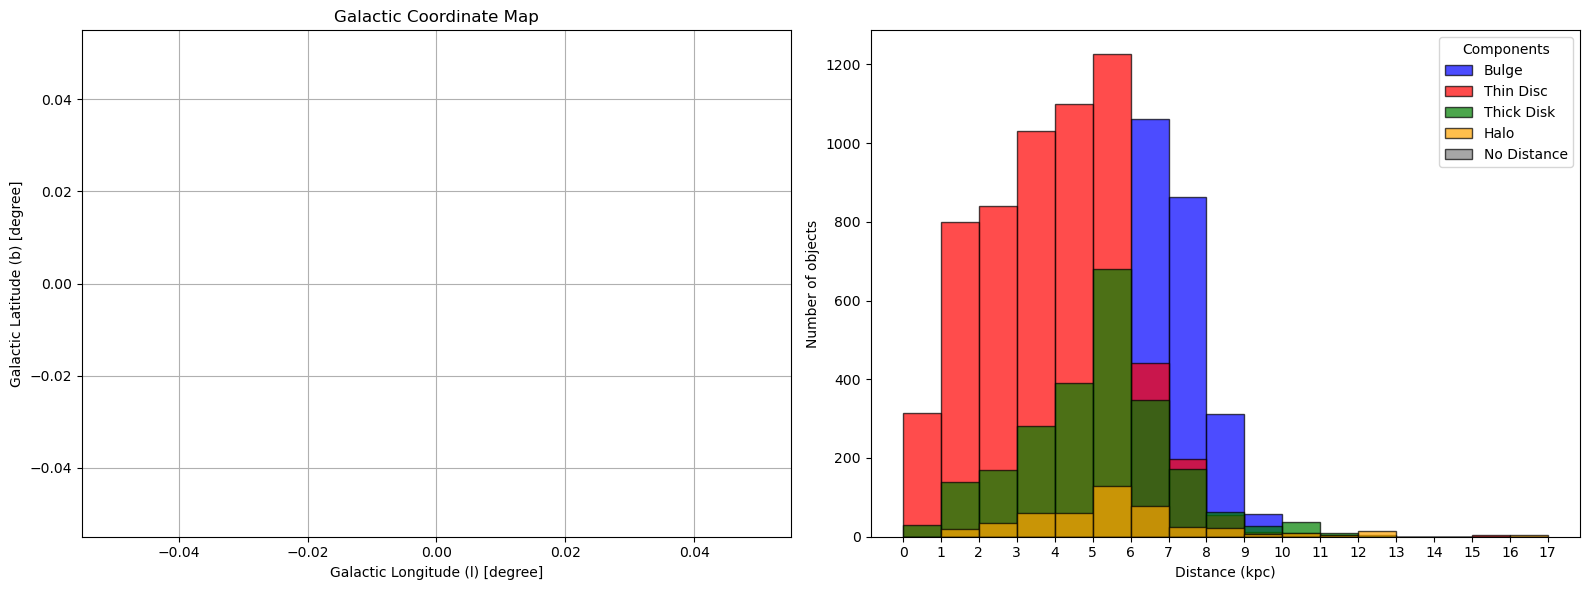

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook

# Excel dosyasını yükle
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx'
sheet_name = 'Sayfa11'

# Excel dosyasını oku
df = pd.read_excel(file_path, sheet_name=sheet_name)

# rgeo sütununu numeric hale çevir ve NaN değerlerini doldur
df['rgeo'] = pd.to_numeric(df['rgeo'], errors='coerce')

# Gbileşen değeri 'Bulge' olan ve rgeo değeri 4 kpc'den küçük olan satırları seç
filtre = (df['Gbileşen'] == 'Bulge') & (df['rgeo'] < 4000)
bulge_4kpc_alti_df = df.loc[filtre]

# Galactic_RA, Galactic_DEC ve Disc_R sütunlarını al
galactic_ra = bulge_4kpc_alti_df['Glon']
galactic_dec = bulge_4kpc_alti_df['Glat']
disc_r = bulge_4kpc_alti_df['Gdist']  # Galaktik merkezden uzaklık sütunu (parsek cinsinden)

# Galaktik koordinatları al
l = galactic_ra
b = galactic_dec

# Galaksi merkezini aitoff projeksiyonu üzerinde 0 dereceye 0 derecede konumlandırmak için
l_centered = (l - 180) % 360 - 180  # -180 ile 180 derece arasında merkezlenmiş boylam

# Harita oluştur
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# İlk grafik: Galactic Coordinate Map
axes[0].grid(True)
axes[0].scatter(np.radians(l_centered), np.radians(b), color='blue', s=5)
axes[0].set_title('Galactic Coordinate Map')
axes[0].set_xlabel('Galactic Longitude (l) [degree]')
axes[0].set_ylabel('Galactic Latitude (b) [degree]')

# Excel dosyasını oku
renklendirilmis_df = pd.read_excel(file_path, sheet_name=sheet_name)

# Kullanılacak sütunları seç
rgeo_sutunu = renklendirilmis_df['rgeo']
gbilesen_sutunu = renklendirilmis_df['Gbileşen']

# rgeo sütununu numeric hale çevir ve NaN değerlerini doldur
rgeo_sutunu = pd.to_numeric(rgeo_sutunu, errors='coerce').fillna(0)

# Verileri pc biriminden kpc birimine dönüştür
rgeo_sutunu_kpc = rgeo_sutunu / 1000

# Renklerin ve etiketlerin belirlenmesi
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disk': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
    'No Distance': 'gray'     # no distance ise gri
}

bins = np.arange(0, 18, 1)

# İkinci grafik: rgeo Histogram with Colors
for component, color in renk_etiketleri.items():
    component_values = rgeo_sutunu_kpc[gbilesen_sutunu == component]
    axes[1].hist(component_values, bins=bins, alpha=0.7, label=component, color=color, edgecolor='black')

axes[1].set_xticks(bins)
axes[1].set_xlabel('Distance (kpc)')
axes[1].set_ylabel('Number of objects')
axes[1].legend(title='Components')

plt.tight_layout()
plt.show()


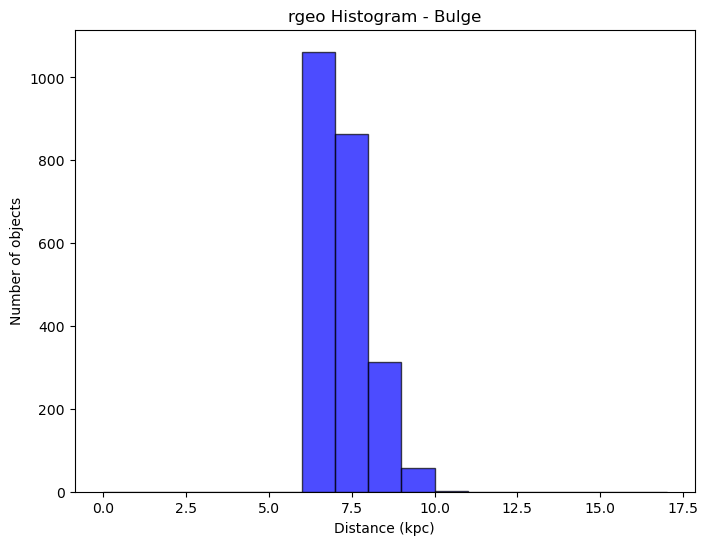

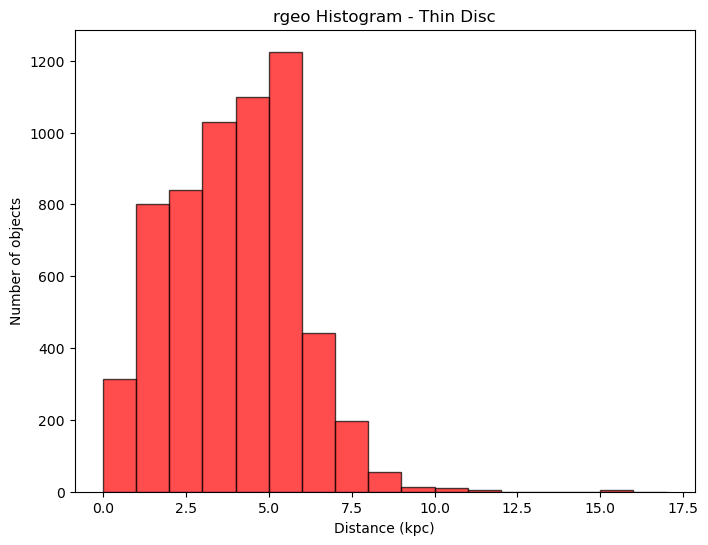

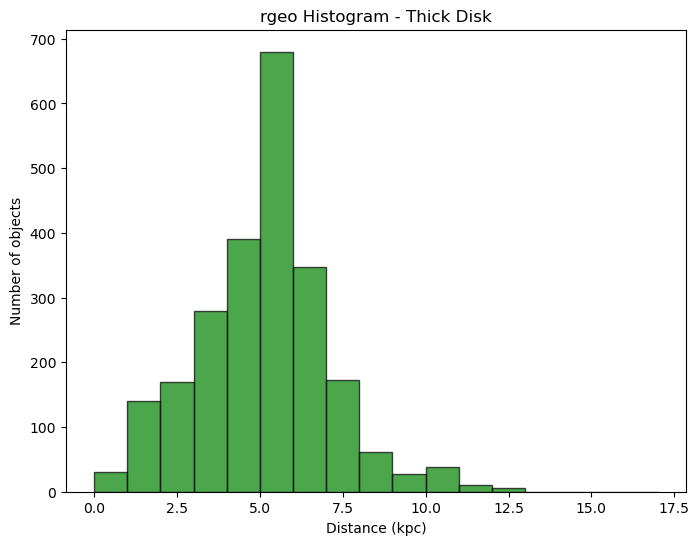

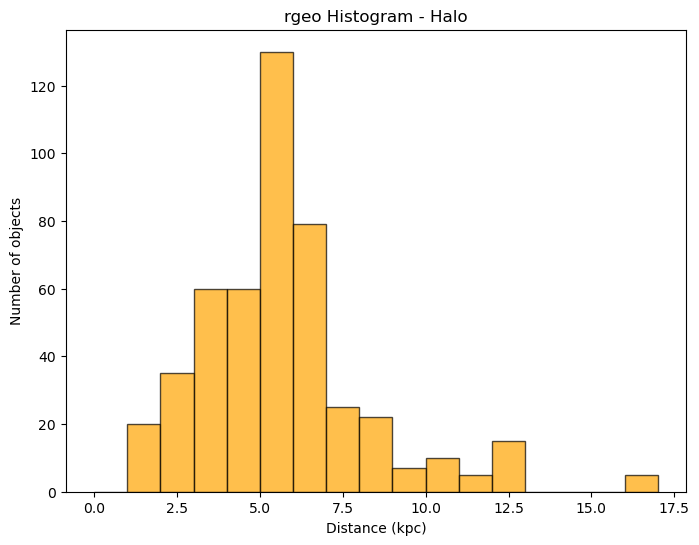

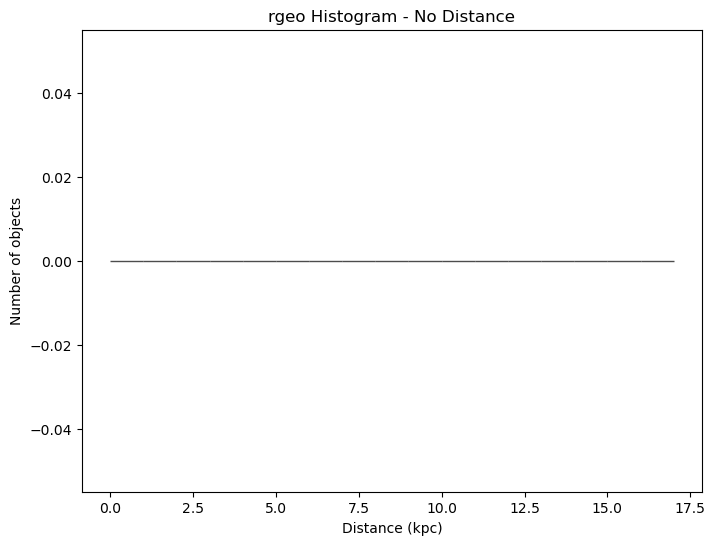

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx"
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa11')

# Kullanılacak sütunları seç
rgeo_sutunu = renklendirilmis_df['rgeo']
gbilesen_sutunu = renklendirilmis_df['Gbileşen']

# Verileri numeric hale çevir ve NaN değerlerini doldur
rgeo_sutunu = pd.to_numeric(rgeo_sutunu, errors='coerce')
rgeo_sutunu = rgeo_sutunu.fillna(0)  # İsteğe bağlı: NaN değerlerini 0 ile doldurabilir veya dropna() ile silebilirsiniz

# Verileri pc biriminden kpc birimine dönüştür
rgeo_sutunu_kpc = rgeo_sutunu / 1000

# Renklerin ve etiketlerin belirlenmesi
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disk': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
    'No Distance': 'gray'     # no distance ise gri
}

bins = np.arange(0, 18, 1)

# Her bir bileşen için ayrı histogramları çiz
for component, color in renk_etiketleri.items():
    plt.figure(figsize=(8, 6))  # Her bileşen için ayrı bir figür oluştur
    component_values = rgeo_sutunu_kpc[gbilesen_sutunu == component]
    plt.hist(component_values, bins=bins, alpha=0.7, color=color, edgecolor='black')
    plt.xlabel('Distance (kpc)')
    plt.ylabel('Number of objects')
    plt.title(f'rgeo Histogram - {component}')
    plt.show()


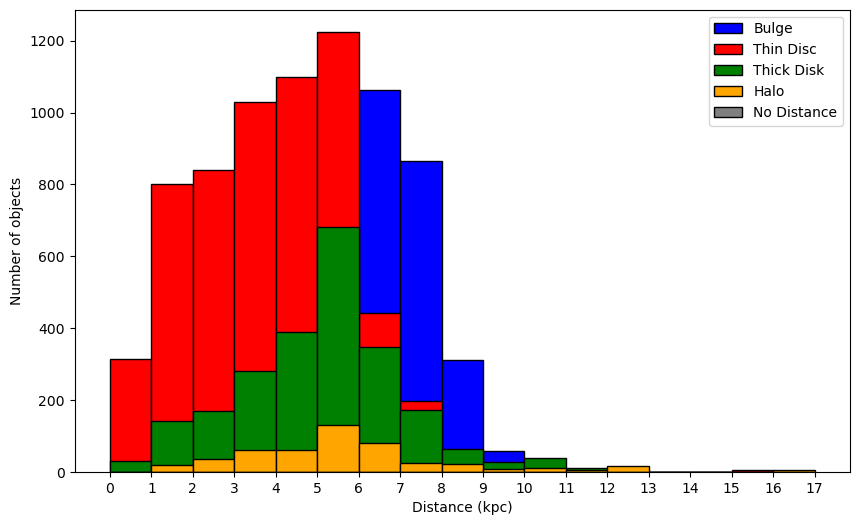

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx"
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa11')

# Kullanılacak sütunları seç
rgeo_sutunu = renklendirilmis_df['rgeo']
gbilesen_sutunu = renklendirilmis_df['Gbileşen']

# Verileri sayısal değerlere dönüştür
rgeo_sutunu = pd.to_numeric(rgeo_sutunu, errors='coerce')

# Verileri pc biriminden kpc birimine dönüştür
rgeo_sutunu_kpc = rgeo_sutunu / 1000

# Renklerin ve etiketlerin belirlenmesi
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disk': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
    'No Distance': 'gray'     # no distance ise gri
}

bins = np.arange(0, 18, 1)

# Tek bir histogram üzerinde tüm bileşenleri çiz
plt.figure(figsize=(10, 6))

for component, color in renk_etiketleri.items():
    component_values = rgeo_sutunu_kpc[gbilesen_sutunu == component]
    plt.hist(component_values, bins=bins, label=component, color=color, edgecolor='black')

plt.xticks(bins)
plt.xlabel('Distance (kpc)')
plt.ylabel('Number of objects')
plt.legend(title='')

# Grafik dosyası yolunu belirle
save_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/histogramlar/binleme/son/Distance.png"
plt.savefig(save_path)

# Grafiği göster
plt.show()


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx"
neat_result_df = pd.read_excel(excel_yolu, sheet_name='neat_result')
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa11')

# Histogramlar için klasör oluştur
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/histogramlar/binleme/son/He/"
if not os.path.exists(klasor_yolu):
    os.makedirs(klasor_yolu)

# Ortalamalar için dosya oluştur
ortalama_dosyasi_yolu = os.path.join(klasor_yolu, "ortalama_degerler.txt")

# Renklendirme fonksiyonu
def get_color(component):
    if component == 'Bulge':
        return 'blue'
    elif component == 'Thin Disc':
        return 'red'
    elif component == 'Thick Disk':
        return 'green'
    elif component == 'Halo':
        return 'orange'
    elif component == 'no distance':
        return 'gray'
    else:
        return None

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df['Gbileşen'].apply(get_color)
renk_dict = renklendirilmis_df.set_index('idPNMain')['color'].to_dict()

# Sütun başlıkları
sutun_basliklari = ['c(Hb) (Ha/Hb)', 'c(Hb) (Hg/Hb)', 'c(Hb) (Hd/Hb)', '[OII] density', '[SII] Density', ' [ArIV] density', 
                    ' [OII] temperature', ' [SII] temperature', ' [NII] temperature', 
                    ' [OI] temperature', '[OIII] Temperature', ' [NeIII] temperature', 
                    ' [ArIII] temperature', ' [ArV] temperature', ' He I temperature (7281/6678)', 
                    'C/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H', 'He/H']

# Histogram parametreleri
histogram_parametreleri = {
    'c(Hb) (Ha/Hb)': {'bins': 50, 'range': (0, 6)},
    'c(Hb) (Hg/Hb)': {'bins': 50, 'range': (0, 6)},
    'c(Hb) (Hd/Hb)': {'bins': 50, 'range': (0, 6)},
    '[OII] density': {'bins': 50, 'range': (0, 20000)},
    '[SII] Density': {'bins': 50, 'range': (0, 15000)},
    ' [ArIV] density': {'bins': 50, 'range': (0, 70000)},
    ' [OII] temperature': {'bins': 50, 'range': (5000, 35000)},
    ' [SII] temperature': {'bins': 50, 'range': (0, 35000)},
    ' [NII] temperature': {'bins': 100, 'range': (5000, 35000)},
    ' [OI] temperature': {'bins': 50, 'range': (0, 35000)},
    '[OIII] Temperature': {'bins': 50, 'range': (5000, 35000)},
    ' [NeIII] temperature': {'bins': 50, 'range': (0, 35000)},
    ' [ArIII] temperature': {'bins': 50, 'range': (5000, 35000)},
    ' [ArV] temperature': {'bins': 50, 'range': (0, 35000)},
    ' He I temperature (7281/6678)': {'bins': 50, 'range': (0, 4e5)},
    'C/H': {'bins': 50, 'range': (0, 1e-3)},
    'N/H': {'bins': 50, 'range': (0, 1e-3)},
    'O/H': {'bins': 50, 'range': (0, 3e-3)},
    'Ne/H': {'bins': 50, 'range': (0, 3e-3)},
    'Ar/H': {'bins': 50, 'range': (0, 175e-7)},
    'S/H': {'bins': 50, 'range': (0, 3e-5)},
    'Cl/H': {'bins': 50, 'range': (0, 0.6e-5)},
    'He/H': {'bins': 50, 'range': (0, 0.5)}
}

# Renklere karşılık gelen etiketler
renk_etiketleri = {
    'red': 'Thin Disc',
    'green': 'Thick Disc',
    'blue': 'Bulge',
    'orange': 'Halo',
    'gray': 'No Distance'
}

# Ortalamaları yazmak için dosyayı aç
with open(ortalama_dosyasi_yolu, 'w') as f:
    # Her sütun için histogram oluştur
    for baslik in sutun_basliklari:
        plt.figure()
        bins = histogram_parametreleri[baslik]['bins']
        range_ = histogram_parametreleri[baslik]['range']
        ortalamalar = {}
        
        for color, etiket in renk_etiketleri.items():
            filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][baslik]
            filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
            
            if not filtreli_veri.empty:
                plt.hist(filtreli_veri, bins=bins, range=range_, edgecolor='black', color=color, label=etiket)
                ortalama = filtreli_veri.mean()
                ortalamalar[etiket] = ortalama
        
        # Ortalama değerleri kesikli çizgilerle göster
        for etiket, ortalama in ortalamalar.items():
            # Ortalama değeri dosyaya bilimsel gösterimle yaz
            f.write(f"{baslik} - {etiket} Ortalama: {ortalama:.2e}\n")
            # Eğer ortalama belirlenen aralıktaysa histogramda göster
            if range_[0] <= ortalama <= range_[1]:
                color = [k for k, v in renk_etiketleri.items() if v == etiket][0]
                plt.axvline(ortalama, color=color, linestyle='dashed', linewidth=1)
        
        # Plot ayarları
        plt.title(baslik)
        plt.xlabel("Değer")
        plt.ylabel("Frekans")
        plt.legend()
        
        # Histogramı kaydet
        kaydet_yolu = os.path.join(klasor_yolu, f"{baslik.replace('/', '_')}.png")
        plt.savefig(kaydet_yolu, dpi=300)
        
        # Plot'u temizle
        plt.clf()

print("Histogramlar başarıyla oluşturuldu ve ortalamalar listeye yazıldı.")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_5422/3166365748.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are 

Histogramlar başarıyla oluşturuldu ve ortalamalar listeye yazıldı.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [75]:
import os

# Ortalamalar dosyasını oku
ortalama_dosyasi_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/histogramlar/binleme/son/He/ortalama_degerler.txt"
with open(ortalama_dosyasi_yolu, 'r') as f:
    ortalama_veriler = f.readlines()

# Ortalamaları bir sözlükte sakla
ortalama_dict = {}
bilesenler = set()
for veri in ortalama_veriler:
    veri = veri.strip()
    baslik, kalan = veri.split(' - ')
    bilesen, ortalama = kalan.split(' Ortalama: ')
    if baslik not in ortalama_dict:
        ortalama_dict[baslik] = {}
    ortalama_dict[baslik][bilesen] = ortalama
    bilesenler.add(bilesen)

# LaTeX formatında tabloyu oluştur
latex_tablo = """
\\begin{table}[H]
\\centering
\\begin{tabular}{|c|""" + 'c|' * len(bilesenler) + """}
\\hline
Sütun Başlığı & """ + ' & '.join(bilesenler) + """ \\\\
\\hline
"""

for baslik, bilesen_dict in ortalama_dict.items():
    row = baslik
    for bilesen in bilesenler:
        row += ' & ' + bilesen_dict.get(bilesen, '')
    latex_tablo += row + " \\\\\n\\hline\n"

latex_tablo += """
\\end{tabular}
\\caption{Ortalama Değerler}
\\label{tab:ortalama_degerler}
\\end{table}
"""

# LaTeX tabloyu dosyaya yaz
latex_tablo_dosyasi_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/histogramlar/binleme/son/He/ortalama_degerler_tablo.tex"
with open(latex_tablo_dosyasi_yolu, 'w') as f:
    f.write(latex_tablo)

print("LaTeX tablosu başarıyla oluşturuldu ve kaydedildi.")


LaTeX tablosu başarıyla oluşturuldu ve kaydedildi.
